# Problem Statement
Use EDA to uncover factors that greatly influencethe risk of diabetes.
Develop a classification model to predict if a person has diabetes. (Yes=1, No=0)
based on attributes like BMI, glucose levels, insulin levels and age.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, kurtosis

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

#import various libraries for model training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import xgboost
from xgboost import XGBClassifier

#importing evaluation metrics
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [2]:
df = pd.read_csv("../Datasets/diabetes.csv")

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isna().sum() #checking for null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.duplicated().sum() #checking for duplicates

0

# Exploratory Data Analysis

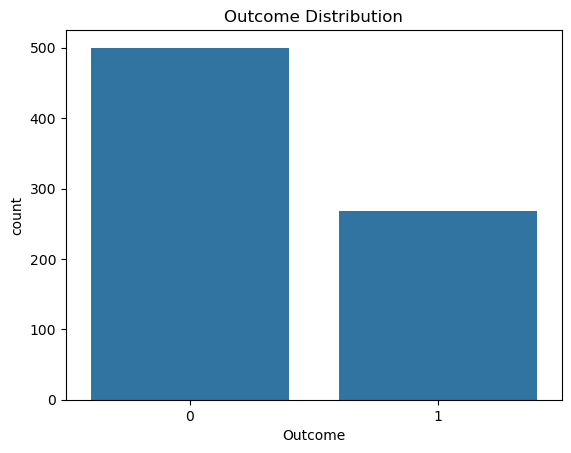

In [6]:
#getting visuals on the target variable: seeing how balanced the data is
sns.countplot(data=df, x="Outcome")
plt.title("Outcome Distribution")

plt.show()

In [7]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
#the countplot shows an imbalanced dataset with (yes=1) being too low

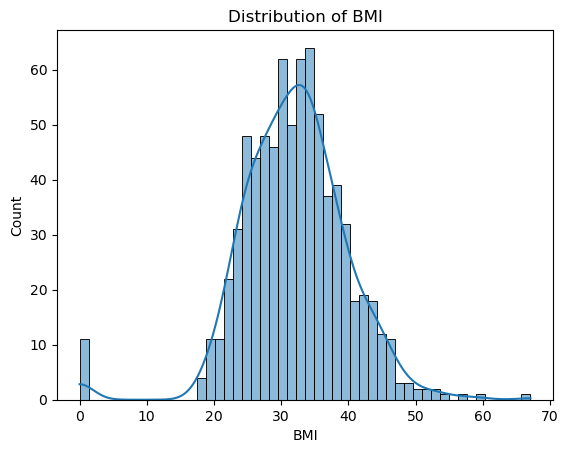

In [9]:
#doing univariate analysis on  Outcome, BMI, insulin levels, glucose levels and age
sns.histplot(df["BMI"], bins=50, kde=True)
plt.title("Distribution of BMI")

plt.show()

In [10]:
bmi_skew = skew(df["BMI"])

bmi_skew

-0.42814327880861786

In [11]:
bmi_kurt = kurtosis(df["BMI"])

bmi_kurt

3.2612574203612645

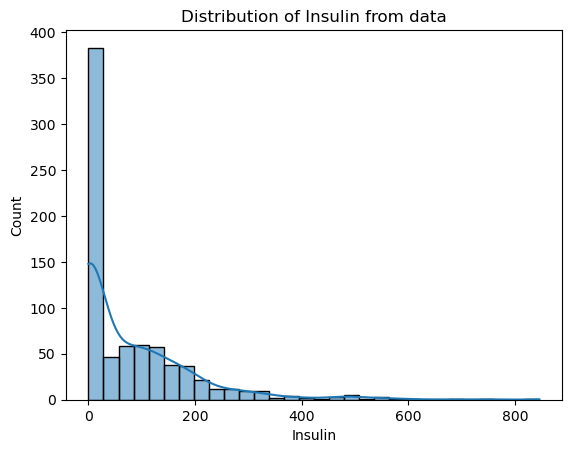

In [12]:
sns.histplot(df["Insulin"], bins=30, kde=True)
plt.title("Distribution of Insulin from data")

plt.show()

In [13]:
insulin_skew = skew(df["Insulin"])

insulin_skew

2.2678104585131753

In [14]:
insulin_kurt = kurtosis(df["Insulin"])

insulin_kurt

7.159574916971424

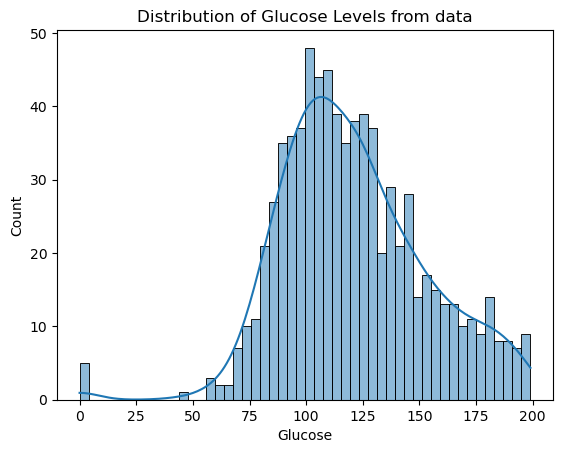

In [15]:
sns.histplot(df["Glucose"], bins=50, kde=True)
plt.title("Distribution of Glucose Levels from data")

plt.show()

In [16]:
glucose_skew = skew(df["Glucose"])

glucose_skew

0.17341395519987735

In [17]:
gluc_kurt = kurtosis(df["Glucose"])

gluc_kurt

0.6288133337300685

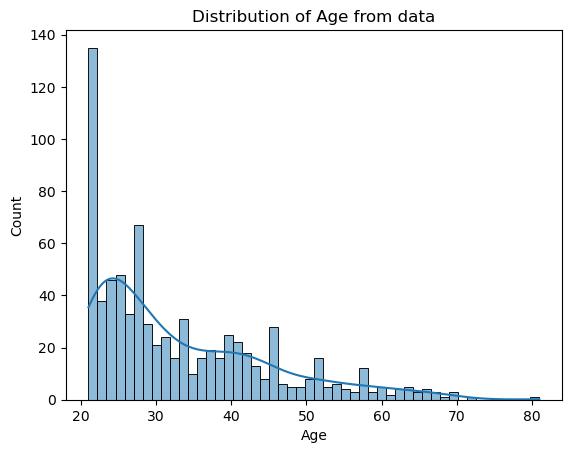

In [18]:
sns.histplot(df["Age"], bins=50, kde=True)
plt.title("Distribution of Age from data")

plt.show()

In [19]:
age_skew = skew(df["Age"])

age_skew

1.127389259531697

In [20]:
age_kurt = kurtosis(df["Age"])

age_kurt

0.6311769413798585

In [21]:
# BMI, Insulin levels, Glucose levels and age all show symmetric distribution and a flat peak.
# therefore the data has a normal distribution with low outliers.

### Bivariate Analysis with Outcome

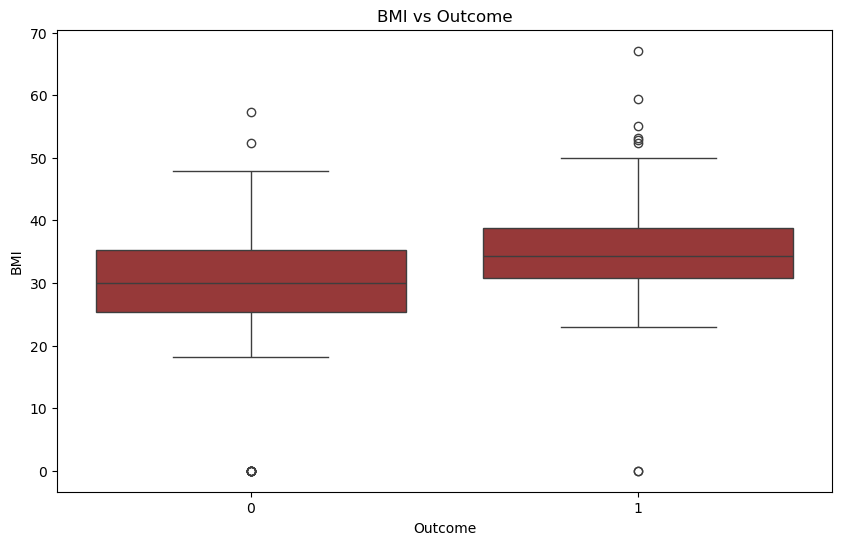

In [22]:
#comparing each variable with the target variable, Outcome and knowing outliers for each
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Outcome", y="BMI", color="brown")
plt.title("BMI vs Outcome")

plt.show()

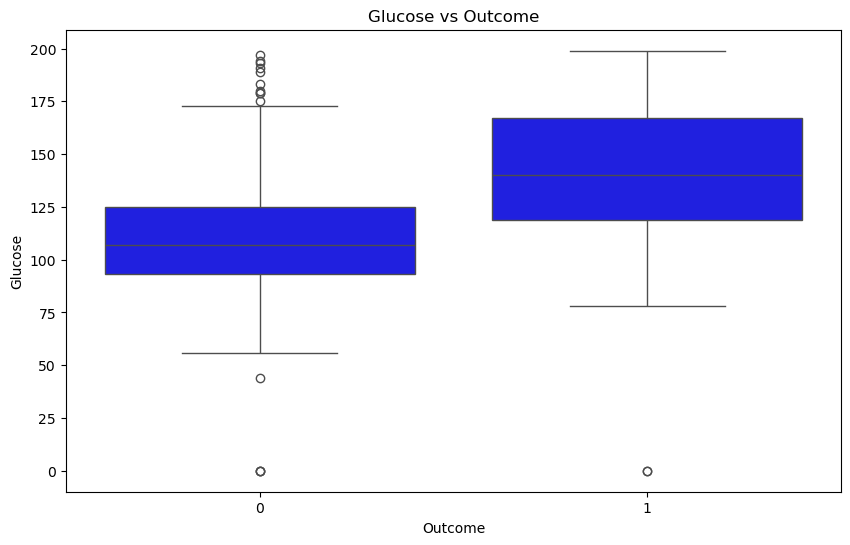

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Outcome", y="Glucose", color="blue")
plt.title("Glucose vs Outcome")

plt.show()

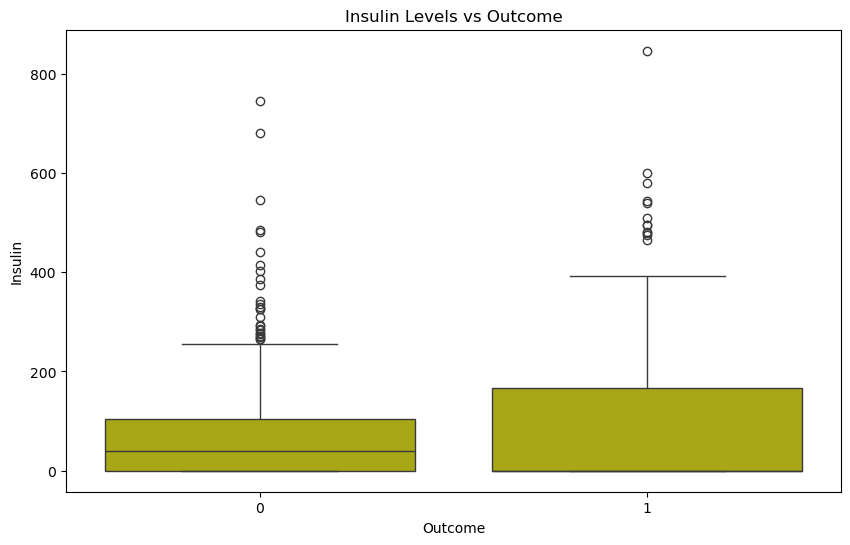

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Outcome", y="Insulin", color="y")
plt.title("Insulin Levels vs Outcome")

plt.show()

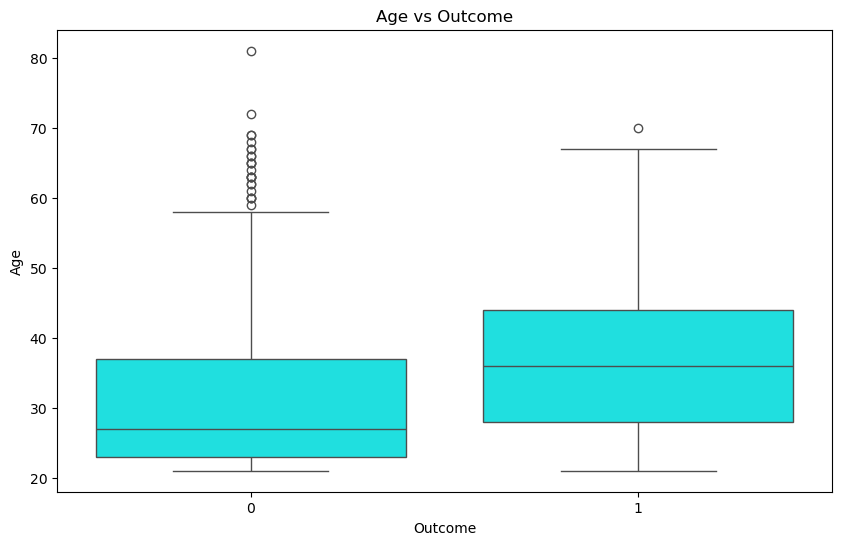

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Outcome", y="Age", color="cyan")
plt.title("Age vs Outcome")

plt.show()

In [26]:
# It is seen above that the variable Insulin has more outliers than the rest.

## Multivariate Analysis with Outcome

<Figure size 3000x1000 with 0 Axes>

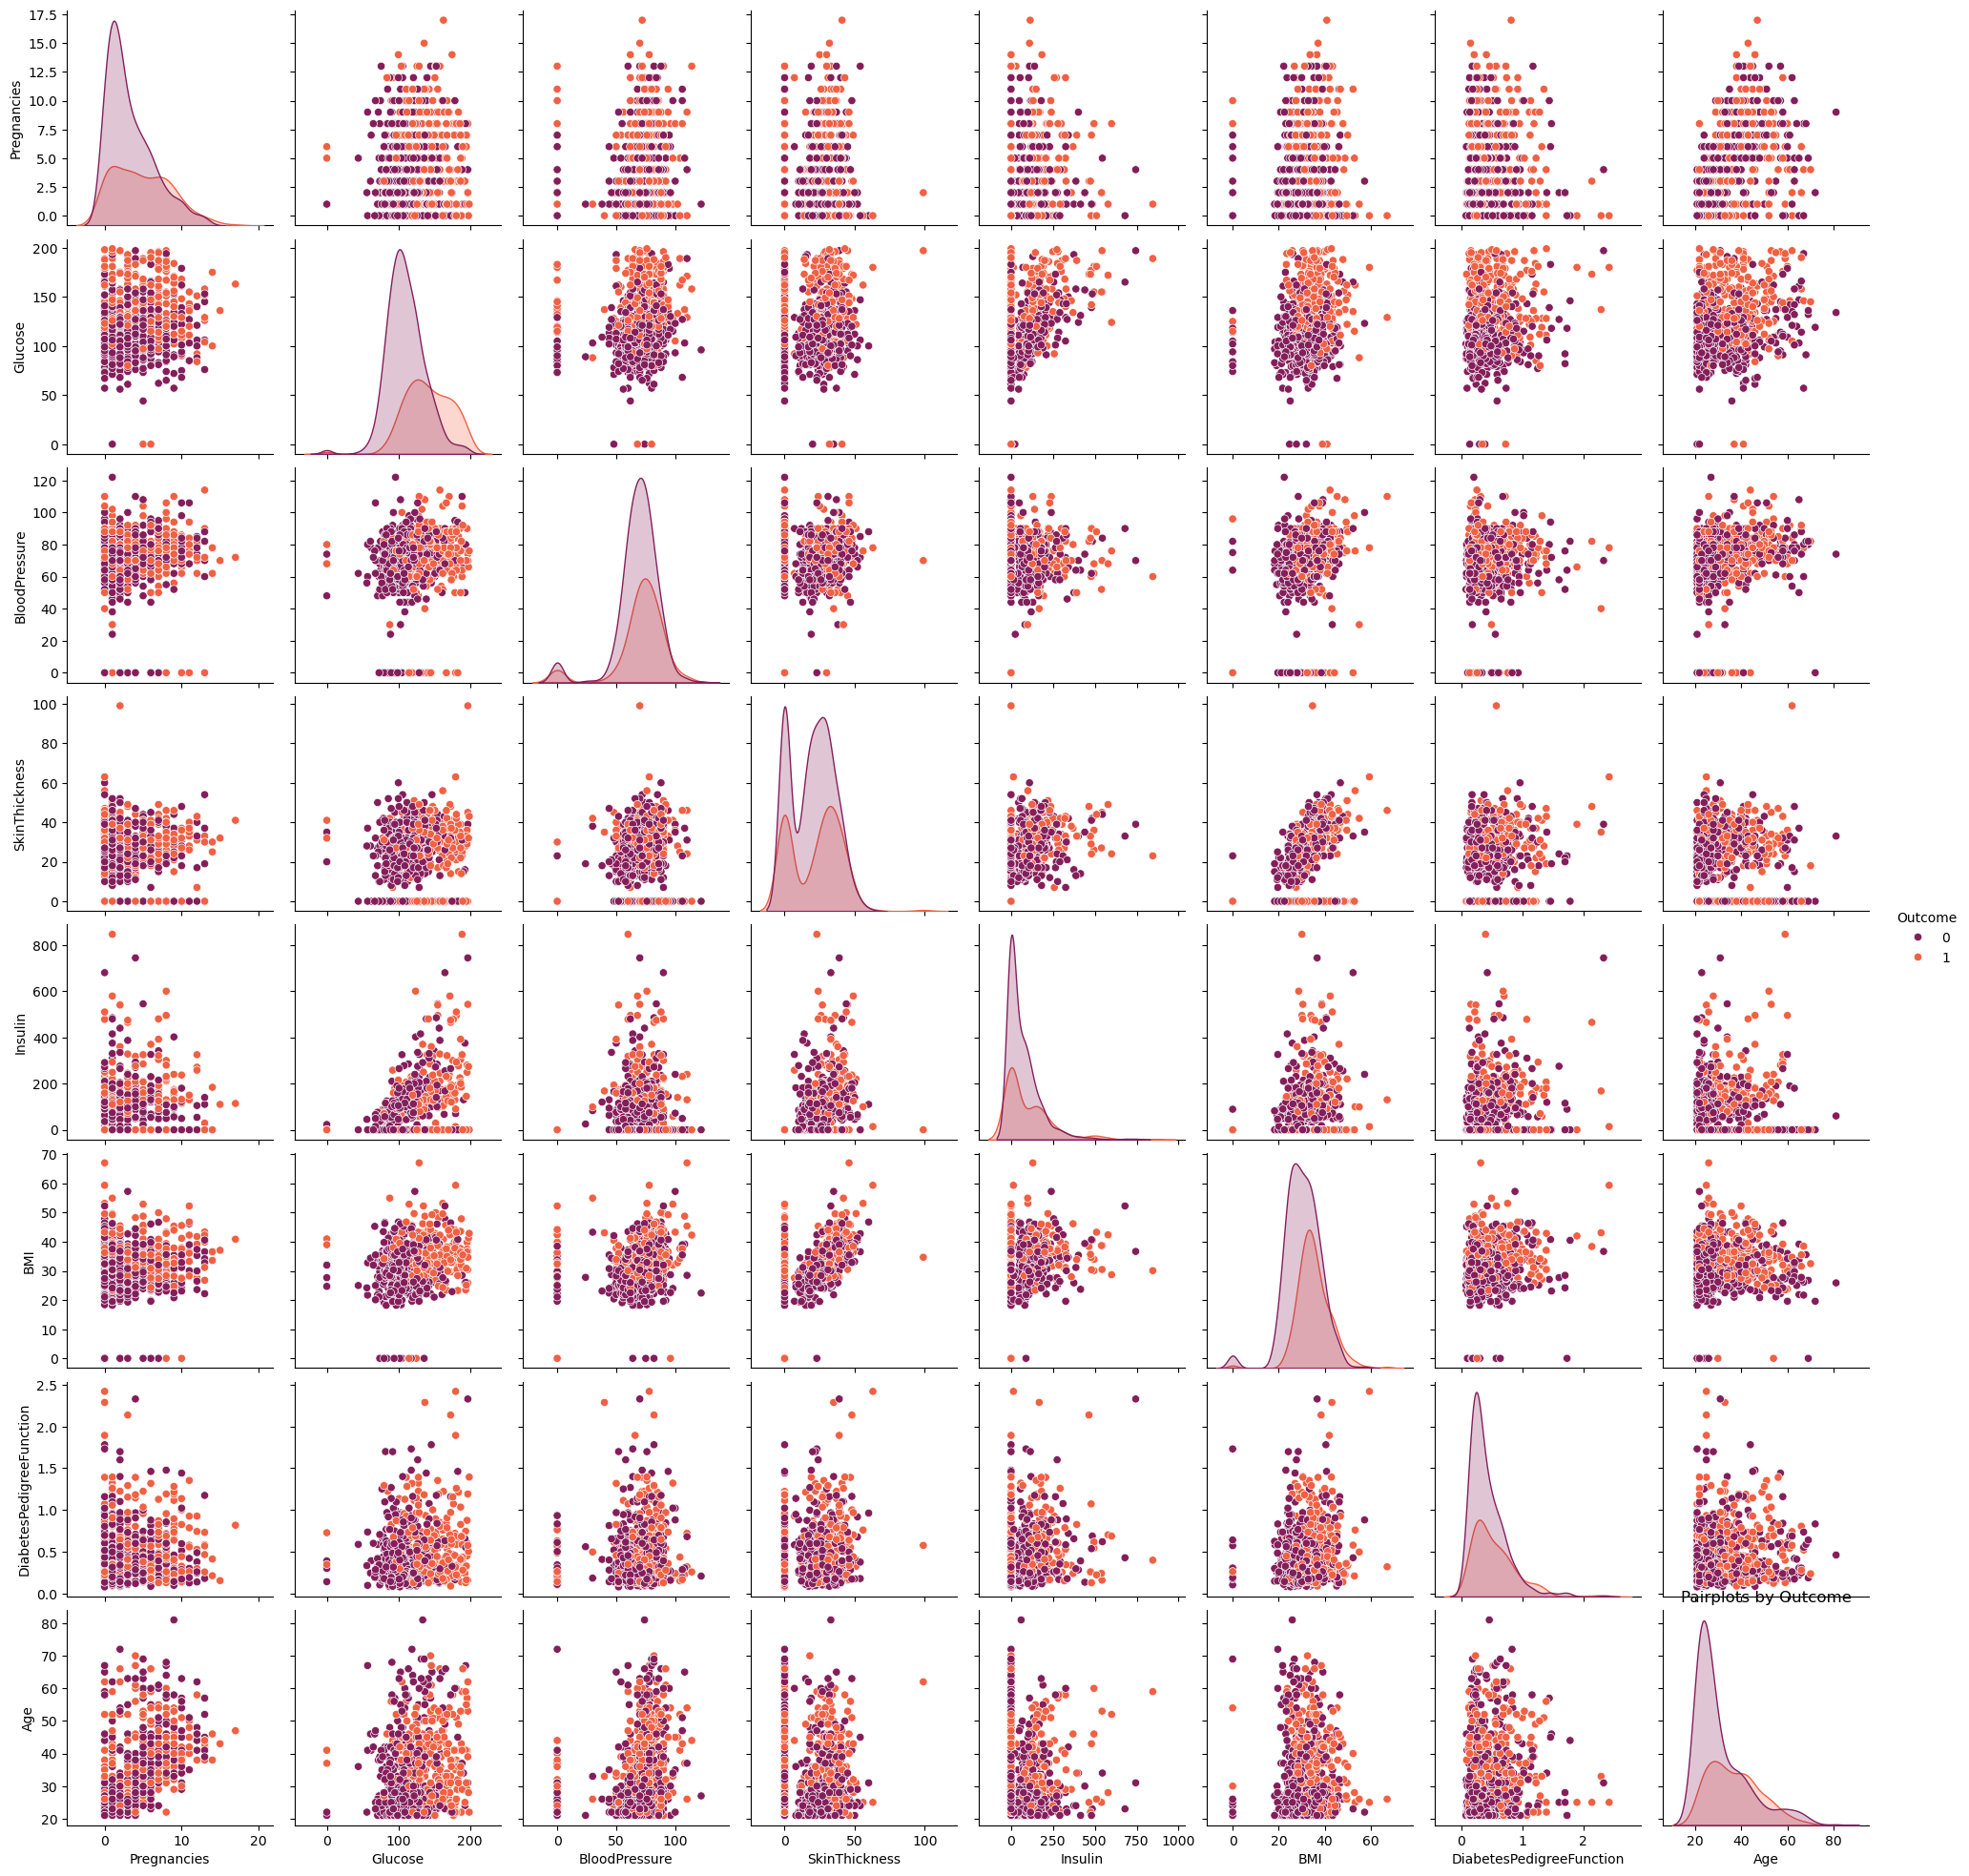

In [27]:
#seeing an overview of how each variable when compared with other variables affects the target variable
plt.figure(figsize=(30,10))
sns.pairplot(data=df, hue="Outcome", palette="rocket")
plt.title("Pairplots by Outcome")

plt.show()

## Correlation Matrix

In [28]:
cm = df.corr()

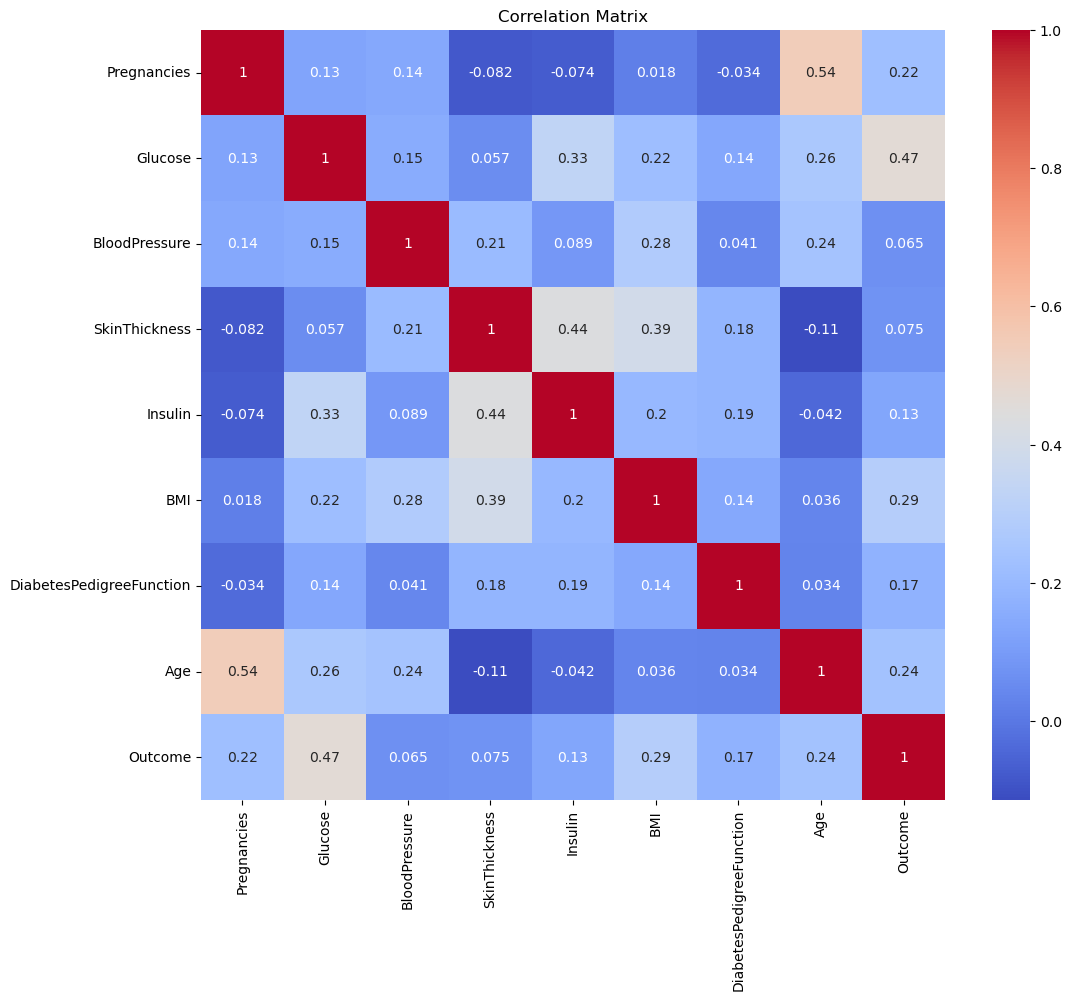

In [29]:
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")

plt.show()

In [30]:
# above shows the data is adequately correlated

## Feature Scaling

In [31]:
#since all features are numeric,encoding step is not needed
X = df.drop(columns="Outcome")
y = df["Outcome"]

In [32]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [33]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [34]:
scale = StandardScaler()

scaleX = scale.fit_transform(X)

In [35]:
scaleX

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

## Splitting Data to train and test

In [36]:
#using a 80:20 split.
X_train, X_test, y_train, y_test = train_test_split(scaleX, y, test_size=0.2, random_state=45)

## Training a Model with different algorithms

In [93]:
# Using the Logistic regression
lg = LogisticRegression()

lg.fit(X_train, y_train)

LogisticRegression()

In [38]:
lg_pred = lg.predict(X_test)

In [94]:
print(accuracy_score(y_test, lg_pred))

print(classification_report(y_test, lg_pred))

0.7337662337662337
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       104
           1       0.60      0.52      0.56        50

    accuracy                           0.73       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.73      0.73      0.73       154



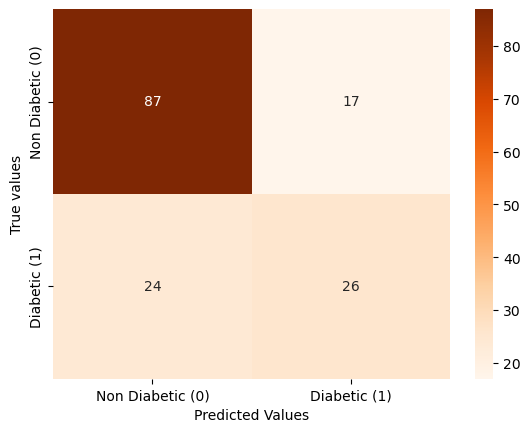

In [40]:
lg_com = confusion_matrix(y_test, lg_pred)
label = ["Non Diabetic (0)", "Diabetic (1)"]

sns.heatmap(lg_com, annot=True, cmap="Oranges", xticklabels=label, yticklabels=label)
plt.xlabel("Predicted Values")
plt.ylabel("True values")

plt.show()

In [41]:
#Using the Random Forest algorithm
rf = RandomForestClassifier(random_state=45)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=45)

In [42]:
rf_pred = rf.predict(X_test)

In [95]:
print(accuracy_score(y_test, rf_pred))

print(classification_report(y_test, rf_pred))

0.7272727272727273
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       104
           1       0.58      0.56      0.57        50

    accuracy                           0.73       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.72      0.73      0.73       154



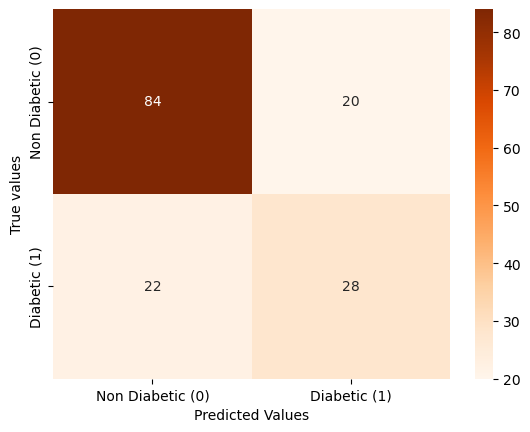

In [44]:
com = confusion_matrix(y_test, rf_pred)
label = ["Non Diabetic (0)", "Diabetic (1)"]

sns.heatmap(com, annot=True, cmap="Oranges", xticklabels=label, yticklabels=label)
plt.xlabel("Predicted Values")
plt.ylabel("True values")

plt.show()

In [45]:
#Using Decision Tree algorithm
dt = DecisionTreeClassifier(random_state=45)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=45)

In [46]:
dt_pred = dt.predict(X_test)


In [96]:
print(accuracy_score(y_test, dt_pred))

print(classification_report(y_test, dt_pred))

0.6883116883116883
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       104
           1       0.52      0.58      0.55        50

    accuracy                           0.69       154
   macro avg       0.65      0.66      0.65       154
weighted avg       0.70      0.69      0.69       154



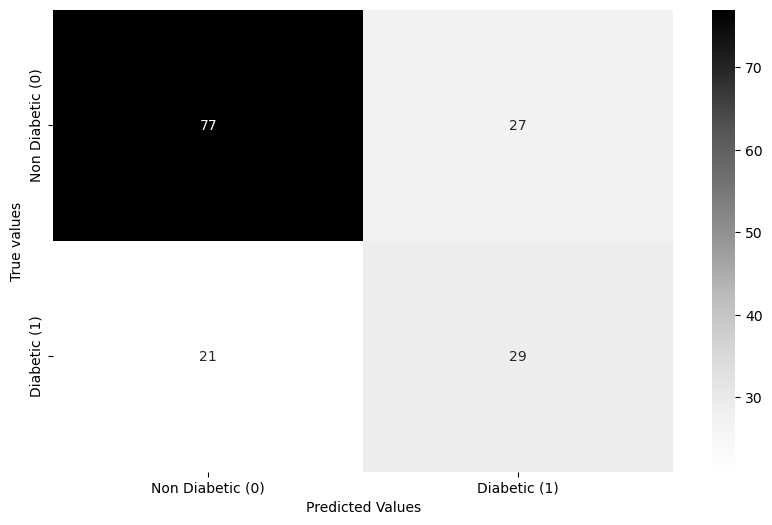

In [48]:
com1 = confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(10,6))
sns.heatmap(com1, annot=True, cmap="Greys", xticklabels=label, yticklabels=label)
plt.xlabel("Predicted Values")
plt.ylabel("True values")

plt.show()

In [49]:
#using K-Nearest Neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
k_pred = knn.predict_proba(X_test)

k_pred

array([[0.4, 0.6],
       [1. , 0. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [0. , 1. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [0.2, 0.8],
       [1. , 0. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.6, 0.4],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       [0.4, 0.6],
       [0. ,

In [51]:
knn.score(X_test, y_test)

0.7142857142857143

In [52]:
#using Support Vector Machines
svm = SVC(kernel='linear')

svm.fit(X_train, y_train)

SVC(kernel='linear')

In [53]:
svm_pred = svm.predict(X_test)

In [97]:
print(accuracy_score(y_test, svm_pred))

print(classification_report(y_test, svm_pred))

0.7467532467532467
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       104
           1       0.63      0.54      0.58        50

    accuracy                           0.75       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154



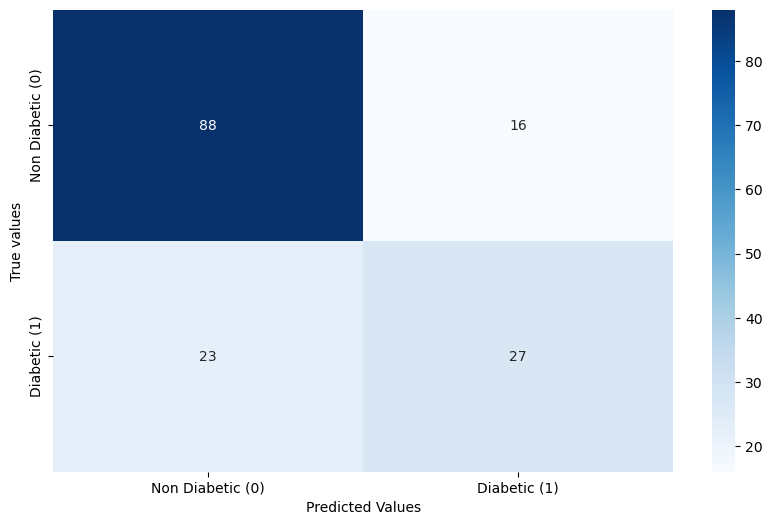

In [55]:
com2 = confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(10,6))
sns.heatmap(com2, annot=True, cmap="Blues", xticklabels=label, yticklabels=label)
plt.xlabel("Predicted Values")
plt.ylabel("True values")

plt.show()

In [56]:
# using Naive Bayes 
nb = GaussianNB()

nb.fit(X_train, y_train)

GaussianNB()

In [57]:
nb_pred = nb.predict(X_test)

In [98]:
print(accuracy_score(y_test, nb_pred))

print(classification_report(y_test, nb_pred))

0.7402597402597403
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       104
           1       0.60      0.60      0.60        50

    accuracy                           0.74       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.74      0.74      0.74       154



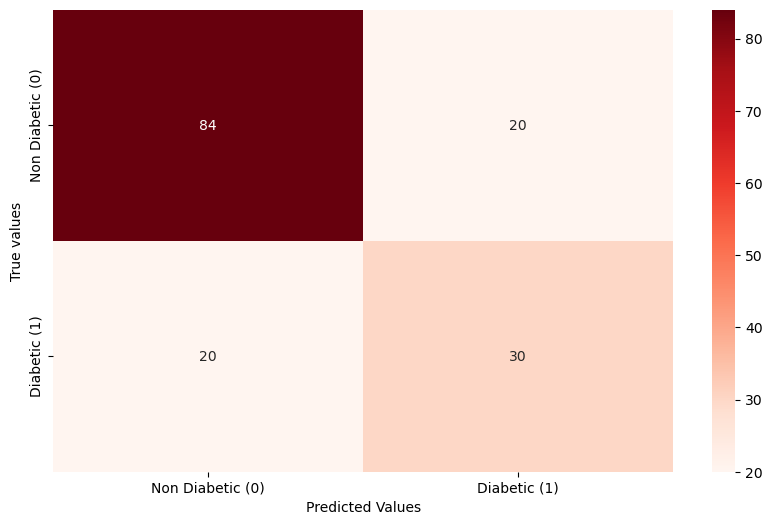

In [99]:
com3 = confusion_matrix(y_test, nb_pred)

plt.figure(figsize=(10,6))
sns.heatmap(com3, annot=True, cmap="Reds", xticklabels=label, yticklabels=label)
plt.xlabel("Predicted Values")
plt.ylabel("True values")

plt.show()

In [60]:
# using XGBoost and Cross validation
boost = XGBClassifier(random_state=45)

In [61]:
scores = cross_val_score(boost, X_train, y_train, cv=3, scoring="accuracy")

In [62]:
scores

array([0.74146341, 0.74634146, 0.78431373])

In [63]:
boost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [64]:
boost_pred = boost.predict(X_test)

In [100]:
print(accuracy_score(y_test, boost_pred))

print(classification_report(y_test, boost_pred))

0.6883116883116883
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       104
           1       0.52      0.56      0.54        50

    accuracy                           0.69       154
   macro avg       0.65      0.66      0.65       154
weighted avg       0.70      0.69      0.69       154



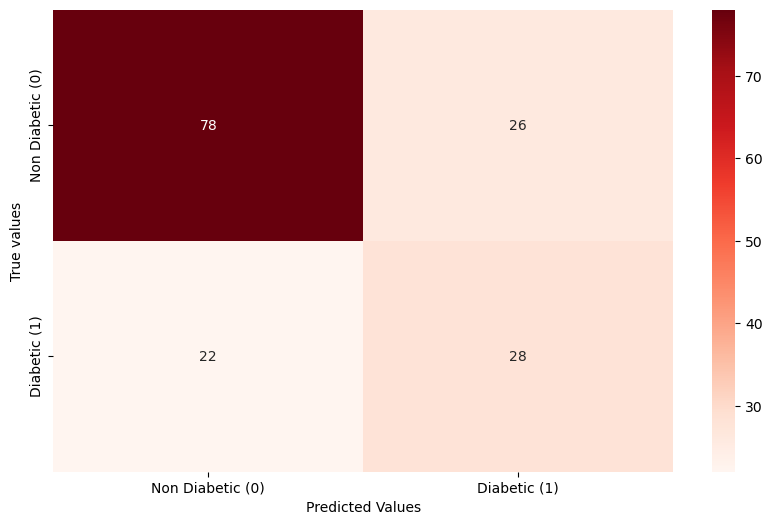

In [66]:
com4 = confusion_matrix(y_test, boost_pred)

plt.figure(figsize=(10,6))
sns.heatmap(com4, annot=True, cmap="Reds", xticklabels=label, yticklabels=label)
plt.xlabel("Predicted Values")
plt.ylabel("True values")

plt.show()

In [67]:
## So far the best model is SVM with better accuracy and F1 score

### Hyperparameter Tuning

In [68]:
#Tuning the Random Forest model
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 45,
 'verbose': 0,
 'warm_start': False}

In [69]:
#define the params grid
param_grid = {"n_estimators":[100, 200, 300], "max_depth":[None, 10, 15, 20], "min_samples_split":[2,3, 4, 5], "min_samples_leaf":[1,2]}

In [70]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring="r2", cv=3, n_jobs=-1)

In [71]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=45), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 15, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [72]:
rand_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, scoring="accuracy", n_iter=50,cv=3, n_jobs=-1, random_state=3)

In [73]:
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=45),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 15, 20],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300]},
                   random_state=3, scoring='accuracy')

In [74]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 200}

In [75]:
best_model = grid_search.best_estimator_

In [76]:
g_pred = best_model.predict(X_test)

In [77]:
accuracy_score(y_test, g_pred)

0.7532467532467533

In [78]:
rand_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': 20}

In [79]:
b_model = rand_search.best_estimator_

In [80]:
r_pred = b_model.predict(X_test)

In [81]:
accuracy_score(y_test, r_pred) 

0.7532467532467533

In [82]:
# aboves gives a better accuracy than the former and even SVM model

In [83]:
#Tuning the XGBoost model
boost.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 45,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [84]:
params ={"learning_rate":[0.0001, 0.001, 0.01, 0.1, 1],
        "max_depth": range(2, 21, 3),
        "colsample_bytree": [i/10 for i in range(3, 10)],
        "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
        "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]}

In [85]:
boost_rand = RandomizedSearchCV(boost, param_distributions=params,
                               n_iter=45,
                               cv=5, 
                               scoring="accuracy",
                               n_jobs=-1,
                               random_state=3)

In [86]:
boost_rand.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=45, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7, 0.8, 0.9],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1],
                                        'max_depth': range(2, 21, 3),
                                        'reg_alpha': [1e-05, 0.01, 0.1, 1, 10,
                                                      100],
                                        'reg_lambda': [1e-05, 0.01, 0.1, 1, 10,
                                                       100]},
                   random_state=3, scoring='accuracy')

In [87]:
boost_rand.best_params_

{'reg_lambda': 1e-05,
 'reg_alpha': 0.01,
 'max_depth': 14,
 'learning_rate': 0.1,
 'colsample_bytree': 0.9}

In [88]:
xb_model = boost_rand.best_estimator_

In [89]:
xg_pred = xb_model.predict(X_test)

In [90]:
accuracy_score(y_test, xg_pred) # better than former accuracy but lower than Random Forest new accuracy

0.6948051948051948

In [91]:
#Tuning the SVM model
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [92]:
param ={"C":[1, 10, 100],
        "gamma": [0.1, 1, 10],
        "kernel": ["linear"],
        "degree": [3, 4, 5, 6]}

In [101]:
svm_grid = GridSearchCV(estimator=svm, param_grid=param, scoring="accuracy", cv=3, n_jobs=-1)

In [103]:
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'degree': [3, 4, 5, 6],
                         'gamma': [0.1, 1, 10], 'kernel': ['linear']},
             scoring='accuracy')

In [104]:
svm_grid.best_params_

{'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel': 'linear'}

In [105]:
best_mod = svm_grid.best_estimator_

b_pred = best_mod.predict(X_test)

In [106]:
print(accuracy_score(y_test, b_pred))

print(classification_report(y_test, b_pred))

0.7467532467532467
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       104
           1       0.63      0.54      0.58        50

    accuracy                           0.75       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154



Shows the best model I have is the tuned  Random Forest model  @ line 81